# 支持向量机

## 线性支持向量机

实际场景中训练数据往往不是线性可分的，当训练数据近似线性可分时，就需要使用线性支持向量机或软间隔支持向量机。

给定训练数据集$T=\{(x_1,y_1),(x_2,y_2),...,(x_N,y_N)\}$,其中$\mathcal{X}=\mathcal{R}^{n},y_i \in \mathcal{Y}=\{-1,+1\},i=1,2,...,N$，$x_i$为第$i$个特征向量，$y_i$为$x_i$的类标记.

由于数据中常常有噪声或特异点等，导致数据线性不可分。这就意味着，部分样本点$(x_i,y_i)$不能满足函数间隔大于等于1的约束条件。为此引入松弛变量$\xi_{i}$，使得约束条件变为：
$$y_i(w \cdot x_i +b) \geqslant 1- \xi_{i}$$
同时，对每一个松弛变量$\xi_{i}$支付一个代价$\xi_{i}$.则目标函数变为：
$${\frac{1}{2}\|w\|^{2}+C \sum_{i=1}^{N}\xi_{i}}$$
其中，$C>0$为惩罚参数.

由此线性不可分的线性支持向量的学习问题转化为凸二次规划问题：
$$\min_{w,b,\xi} \quad \frac{1}{2}\|w\|^{2}+C\sum_{i=1}^{N}\xi_{i}$$
$$s.t \quad y_i(w \cdot x_i+b) \geqslant 1- \xi_{i}, \quad i=1,2,...,N$$
$$\xi_{i} \geqslant 0,\quad i=1,2,...,N$$

## 定义 线性支持向量机
对于给定的线性不可分的训练数据集，通过求解凸二次规划问题，即软间隔最大化问题，可得到分离的超平面：$w^{*} \cdot x+b^{*}$
以及相应的分类决策函数：$f(x)=\operatorname{sign}(w^{*} \cdot x+b^{*})$，称为线性支持向量机.

## 线性支持向量机学习算法
输入：训练数据集$T=\{(x_1,y_1),(x_2,y_2),...,(x_N,y_N)\}$,其中$\mathcal{X}=\mathcal{R}^{n},y_i \in \mathcal{Y}=\{-1,+1\},i=1,2,...,N$；

输出：分离超平面和分类决策函数。

第一步:选择惩罚参数$C>0$，构造并求解凸二次规划问题
$${\min_{\alpha} \quad \frac{1}{2}\sum_{i=1}^{N}\sum_{j=1}^{N}\alpha_{i}\alpha_{j}y_{i}y_{j}(x_i \cdot x_j)-\sum_{i=1}^{N}\alpha_{i}}$$

$${s.t. \quad \sum_{i=1}^{N}\alpha_{i}y_i=0}$$

$${0 \leqslant \alpha_{i} \leqslant C,\quad i=1,2, \cdots ,N}$$
求得最优化问题的解$\alpha^{*}=(\alpha_{1}^{*},\alpha_{2}^{*}, \cdots,\alpha_{N}^{*})^{T}$

第二步:计算${w^{*}=\sum_{i=1}^{N}\alpha_{i}^{*}  y_{i} x_{i}}$,并选择$\alpha^{*}$的一个分量$a_{j}^{*}$适合条件$0< \alpha_{j}^{*}<C$，计算
$$b^{*}=y_i-\sum_{i=1}^{N}y_{i}\alpha_{i}^{*}(x_i \cdot x_j)$$

第三步：求得分离超平面$$w^{*} \cdot x+b^{*}$$,分类决策函数为:$$f(x)=\operatorname{sign}(w^{*} \cdot x+b^{*})$$

### 线性支持向量机的TensorFlw实现

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

# 创建计算图
sess = tf.Session()

E:\softinstall\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\softinstall\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\softinstall\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\softinstall\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

加载数据并划分数据，80%数据用来训练，20%的数据用来做测试

In [2]:
#加载数据
# iris数据 [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y==0 else -1 for y in iris.target])

#加载数据
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [3]:
# 声明参数
batch_size = 100 #批量大小
max_iter=500     #最大迭代次数

# 初始化占位符
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

#创建变量
A = tf.Variable(tf.random_normal(shape=[2,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))


#声明操作 模型
model_output = tf.subtract(tf.matmul(x_data, A), b)

# 声明L2正则化
l2_norm = tf.reduce_sum(tf.square(A))


Instructions for updating:
Colocations handled automatically by placer.


#### 声明损失函数：
$loss=\max(0, 1-pred*actual) + alpha * L2_{norm}(A)^2$

In [4]:
# 声明损失函数
# = max(0, 1-pred*actual) + alpha * L2_norm(A)^2
# L2 正则化参数 alpha
alpha = tf.constant([0.01])
# Margin term in loss
classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model_output, y_target))))
# 损失函数
loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

# 声明预测函数
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

# 声明优化器
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

# 初始化变量
init = tf.global_variables_initializer()
sess.run(init)

开始训练

In [5]:
# 开始训练
loss_vec = []
train_accuracy = []
test_accuracy = []
for i in range(max_iter):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    train_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    train_accuracy.append(train_acc_temp)
    
    test_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_accuracy.append(test_acc_temp)
    
    if (i+1)%100==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('损失为 ' + str(temp_loss))

# 提取系数
[[a1], [a2]] = sess.run(A)
[[b]] = sess.run(b)
slope = -a2/a1
y_intercept = b/a1

# 提取 x1 and x2 vals
x1_vals = [d[1] for d in x_vals]

# Get best fit line
best_fit = []
for i in x1_vals:
  best_fit.append(slope*i+y_intercept)

# 分离数据
setosa_x = [d[1] for i,d in enumerate(x_vals) if y_vals[i]==1]
setosa_y = [d[0] for i,d in enumerate(x_vals) if y_vals[i]==1]
not_setosa_x = [d[1] for i,d in enumerate(x_vals) if y_vals[i]==-1]
not_setosa_y = [d[0] for i,d in enumerate(x_vals) if y_vals[i]==-1]

Step #100 A = [[ 0.3256772]
 [-1.7128085]] b = [[0.4795376]]
损失为 [0.2035206]
Step #200 A = [[ 0.3378925]
 [-1.8955673]] b = [[0.43253773]]
损失为 [0.17095703]
Step #300 A = [[ 0.34991425]
 [-2.0236382 ]] b = [[0.39213777]]
损失为 [0.13121474]
Step #400 A = [[ 0.35296836]
 [-2.1092963 ]] b = [[0.3603377]]
损失为 [0.13701048]
Step #500 A = [[ 0.3548157]
 [-2.185194 ]] b = [[0.3308377]]
损失为 [0.12115982]


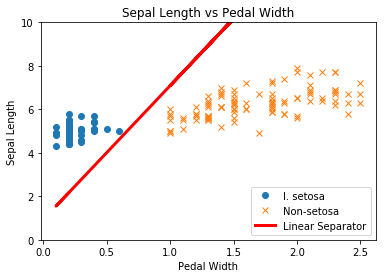

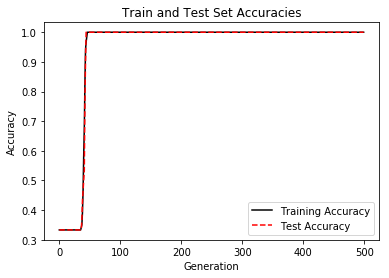

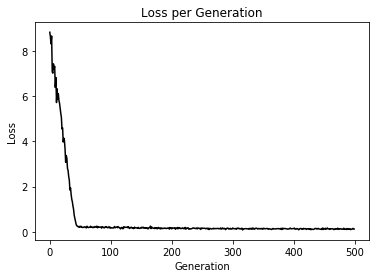

In [6]:
# 分类效果展示
plt.plot(setosa_x, setosa_y, 'o', label='I. setosa')
plt.plot(not_setosa_x, not_setosa_y, 'x', label='Non-setosa')
plt.plot(x1_vals, best_fit, 'r-', label='Linear Separator', linewidth=3)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# 训练和测试精度展示
plt.plot(train_accuracy, 'k-', label='Training Accuracy')
plt.plot(test_accuracy, 'r--', label='Test Accuracy')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# 损失与迭代次数的关系
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

**上述案例均已通过**

----
参考资料：  
《统计学习方法》  
《Tensorflow-machine-learning-cookbook》  

整理制作：深度学习学研社

<div>
<table align="left" border="1" bordercolor="#000000">
    <div>
    <tr>
        <td>
            微信公众号：ID: AI_class_vip<br>
            <img src="../image/gongzhonghao.jpg" width="150" height="150" align="left"/>    
        </td>
    </tr>
    </div>
    <div>
    <tr>
        <td>
        知识星球：机器学习交流学习圈：<br>
    <img src="../image/dlzhishixingqiu.jpg" width="150" height="150" align="left"/>  
        </td>
    </tr>
        </div>
    <div>
     <tr>
        <td>
        配置环境：python 3.4+  
        </td>
    </tr>
        </div>
</table>
</div>
